## Define the Hamiltonian

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def QWZ_model(m, kx, ky):

    k = np.array([kx, ky])
    
    pauli0 = np.eye(2)
    pauli1 = np.array([[0, 1], [1, 0]])
    pauli2 = np.array([[0, -1j], [1j, 0]])
    pauli3 = np.array([[1, 0], [0, -1]])

    hk = np.sin(kx) * pauli1 + np.sin(ky) * pauli2 + (2-m-np.cos(kx)-np.cos(ky)) * pauli3

    return hk

## Plot the dispersion relation

In [3]:
def get_eigen(m, kx, ky):
    hk = QWZ_model(m, kx, ky)
    E,states=np.linalg.eigh(hk)
    return E[0],E[1],states

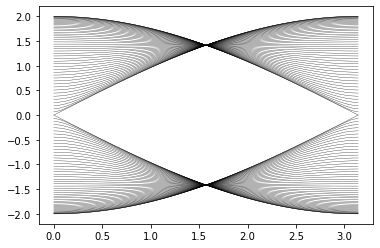

In [50]:
m=2

for ky in np.linspace(0,np.pi):
    En_lower=[]
    En_upper=[]
    kxrange=np.linspace(0,np.pi)
    for kx in kxrange:
        E_lower,E_upper,states = get_eigen(m, kx, ky)
        En_lower.extend([E_lower])
        En_upper.extend([E_upper])
    plt.plot(kxrange, En_lower, color="k", linewidth=0.3)
    plt.plot(kxrange, En_upper, color="k", linewidth=0.3)

In [9]:
def band_plot(band_id,m,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,100)
    ymom=np.linspace(0,kymax,100)

    En_lower=[]
    En_upper=[]
    for kx in xmom:
        for ky in ymom:
            E_lower,E_upper,states = get_eigen(m, kx, ky)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    if band_id==0:
        plt.contourf(xmom, ymom, Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_lower.pdf")
    elif band_id==1:
        plt.contourf(xmom, ymom, Energy_upper, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_upper.pdf")
    elif band_id==-1:
        plt.contourf(xmom, ymom, Energy_upper-Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_diff.pdf")

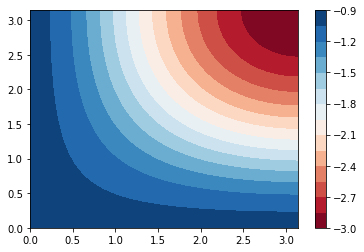

In [52]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(0,1,2*np.pi,2*np.pi,[2*np.pi,2*np.pi]) 

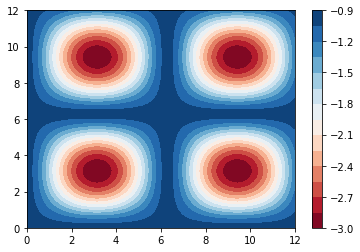

In [13]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(0,1,12,12,[12,12]) 

## Calculate the lattice field

In [15]:
def Lat_Field(m,mom,delta_mom):
    
    mom=mom
    momx=np.array([mom[0]+delta_mom[0],mom[1]])
    momy=np.array([mom[0],mom[1]+delta_mom[1]])
    momxy=np.array([mom[0]+delta_mom[0],mom[1]+delta_mom[1]])
    
    El,Eu,psi=get_eigen( m, mom[0], mom[1])
    Elx,Eux,psix=get_eigen(m, momx[0], momx[1])
    Ely,Eux,psiy=get_eigen(m, momy[0], momy[1])
    Elxy,Euxy,psixy=get_eigen(m, momxy[0], momxy[1])
    
    U1x=(np.conj(psi[:,0])@psix[:,0])/(np.absolute(np.conj(psi[:,0])@psix[:,0]))
    U1y=(np.conj(psi[:,0])@psiy[:,0])/(np.absolute(np.conj(psi[:,0])@psiy[:,0]))
    U2x=(np.conj(psix[:,0])@psixy[:,0])/(np.absolute(np.conj(psix[:,0])@psixy[:,0]))
    U2y=(np.conj(psiy[:,0])@psixy[:,0])/(np.absolute(np.conj(psiy[:,0])@psixy[:,0]))

    LField=np.log(U1x*U2x/(U2y*U1y))

    return LField

## Calculating the Berry curvature and Chern number

In [16]:
def berry_curv_plot(m,kxmax,kymax,A):  
    xmom=np.linspace(0,kxmax,200)
    ymom=np.linspace(0,kymax,200)
    
    delta_mom=np.array([kxmax/200,kymax/200])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
      
    Berry_curvature=np.transpose(np.reshape(Berry_curv,(len(xmom),len(ymom))))
    plt.contourf(xmom, ymom, np.imag(Berry_curvature), 15, cmap='RdBu')
    plt.xlim(0,A[0])
    plt.ylim(0,A[1])
    plt.colorbar();
    plt.savefig("Berry_curvature.pdf")
    
    print("The chern number is: "+str(np.real(chern)))

<IPython.core.display.Javascript object>


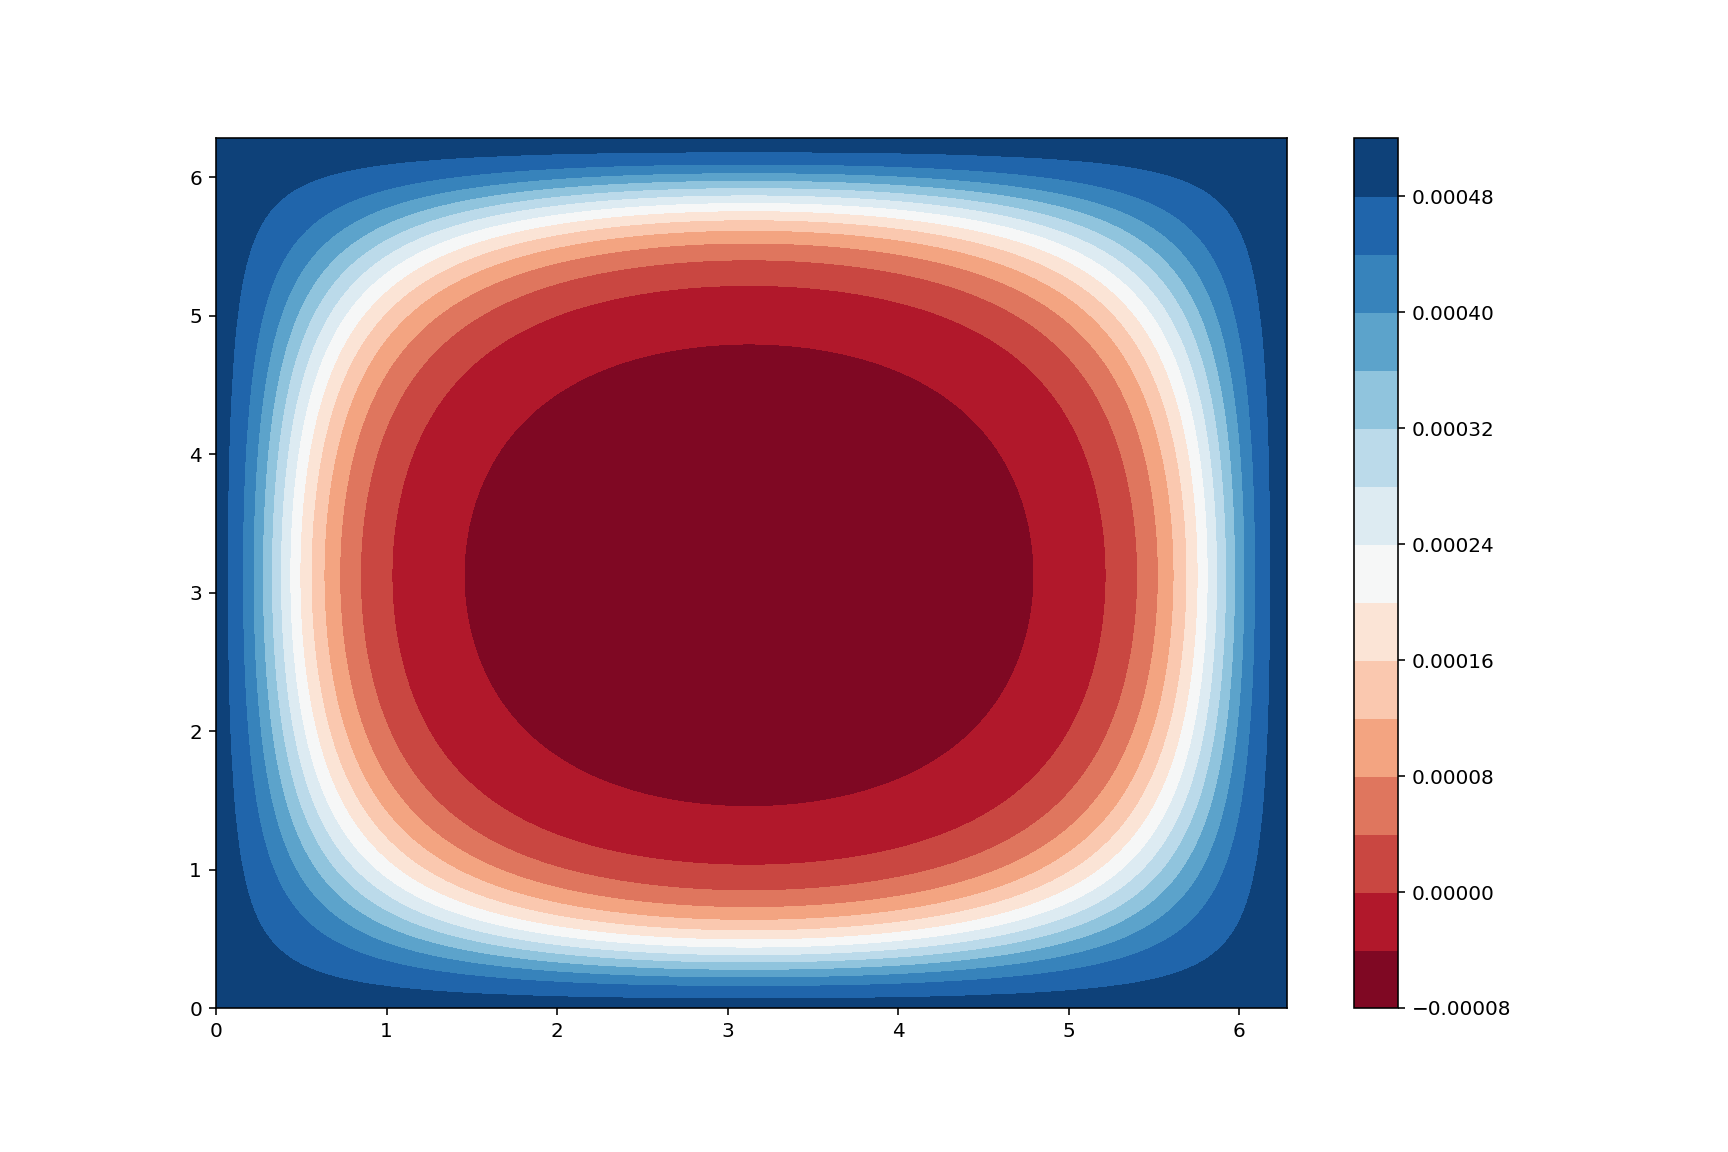

The chern number is: 1.0213444240588578


In [54]:
%matplotlib notebook

berry_curv_plot(1,2*np.pi,2*np.pi,[2*np.pi,2*np.pi])

In [34]:
def chern(m,kxmax,kymax):  
    xmom=np.linspace(0,kxmax,50)
    ymom=np.linspace(0,kymax,50)
    
    delta_mom=np.array([kxmax/50,kymax/50])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
    return np.real(chern)

In [44]:
Chern=[]

mrange=np.linspace(0,6,100)

n=0

for m in mrange:
    n+=1
    c=chern(m,2*np.pi,2*np.pi)
    Chern.extend([round(c)])
    print(m,round(c),n/100*100)

0.0 0 1.0
0.06060606060606061 1 2.0
0.12121212121212122 1 3.0
0.18181818181818182 1 4.0
0.24242424242424243 1 5.0
0.30303030303030304 1 6.0
0.36363636363636365 1 7.000000000000001
0.42424242424242425 1 8.0
0.48484848484848486 1 9.0
0.5454545454545454 1 10.0
0.6060606060606061 1 11.0
0.6666666666666667 1 12.0
0.7272727272727273 1 13.0
0.7878787878787878 1 14.000000000000002
0.8484848484848485 1 15.0
0.9090909090909092 1 16.0
0.9696969696969697 1 17.0
1.0303030303030303 1 18.0
1.0909090909090908 1 19.0
1.1515151515151516 1 20.0
1.2121212121212122 1 21.0
1.2727272727272727 1 22.0
1.3333333333333335 1 23.0
1.393939393939394 1 24.0
1.4545454545454546 1 25.0
1.5151515151515151 1 26.0
1.5757575757575757 1 27.0
1.6363636363636365 1 28.000000000000004
1.696969696969697 1 28.999999999999996
1.7575757575757576 1 30.0
1.8181818181818183 1 31.0
1.878787878787879 1 32.0
1.9393939393939394 1 33.0
2.0 -1 34.0
2.0606060606060606 -1 35.0
2.121212121212121 -1 36.0
2.1818181818181817 -1 37.0
2.24242424242

## Phase diagram

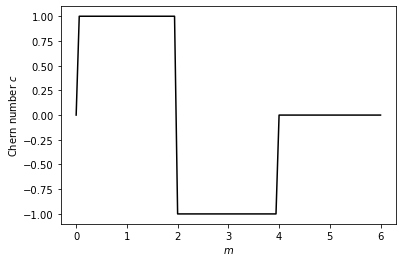

In [46]:
%matplotlib inline
plt.plot(mrange,Chern,color="k")
plt.xlabel("$m$")
plt.ylabel("Chern number $c$")
plt.show()